# Machine Learning Engineer Nanodegree
## Supervised Learning
## Project 2: Building a Student Intervention System

Welcome to the second project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

### Question 1 - Classification vs. Regression
*Your goal for this project is to identify students who might need early intervention before they fail to graduate. Which type of supervised learning problem is this, classification or regression? Why?*

**Answer: ** This is classification problem because the output (target) is discrete.  The output is either yes or no.  Yes means the student(s) will likely pass and will not require intervention.  No means student(s) has high risk of not passing and will likely require intervention before it is too late.  

## Exploring the Data
Run the code cell below to load necessary Python libraries and load the student data. Note that the last column from this dataset, `'passed'`, will be our target label (whether the student graduated or didn't graduate). All other columns are features about each student.

In [1]:
# Import libraries
import numpy as np
import pandas as pd
from time import time
from sklearn.metrics import f1_score


# Read student data
student_data = pd.read_csv("student-data.csv")
print "Student data read successfully!"

Student data read successfully!


### Implementation: Data Exploration
Let's begin by investigating the dataset to determine how many students we have information on, and learn about the graduation rate among these students. In the code cell below, you will need to compute the following:
- The total number of students, `n_students`.
- The total number of features for each student, `n_features`.
- The number of those students who passed, `n_passed`.
- The number of those students who failed, `n_failed`.
- The graduation rate of the class, `grad_rate`, in percent (%).


In [2]:
# TODO: Calculate number of students
n_students = len(student_data.index)

# TODO: Calculate number of features
n_features = len(student_data.columns)

# TODO: Calculate passing students
n_passed = (student_data['passed'] == 'yes').sum(axis=0)

# TODO: Calculate failing students
n_failed = (student_data['passed'] == 'no').sum(axis=0)

# TODO: Calculate graduation rate
grad_rate = (float(n_passed) / float(n_students))*100

# Print the results
print "Total number of students: {}".format(n_students)
print "Number of features: {}".format(n_features)
print "Number of students who passed: {}".format(n_passed)
print "Number of students who failed: {}".format(n_failed)
print "Graduation rate of the class: {:.2f}%".format(grad_rate)

Total number of students: 395
Number of features: 31
Number of students who passed: 265
Number of students who failed: 130
Graduation rate of the class: 67.09%


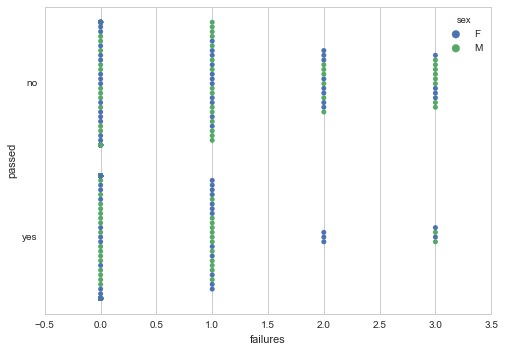

In [85]:
# My own plots to make some sense out of the data visually

%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt


student_data_tmp = student_data

# replace some categorical values with numeric values for graph

#student_data_tmp['famsup'] = student_data_tmp['famsup'].replace(['yes','no'],[1,0])
#student_data_tmp['schoolsup'] = student_data_tmp['schoolsup'].replace(['yes','no'],[1,0])
#student_data_tmp['paid'] = student_data_tmp['paid'].replace(['yes','no'],[1,0])
#student_data_tmp['activities'] = student_data_tmp['activities'].replace(['yes','no'],[1,0])
#student_data_tmp['higher'] = student_data_tmp['higher'].replace(['yes','no'],[1,0])
#student_data_tmp['romantic'] = student_data_tmp['romantic'].replace(['yes','no'],[1,0])
#student_data_tmp['nursery'] = student_data_tmp['nursery'].replace(['yes','no'],[1,0])
#student_data_tmp['famsize'] = student_data_tmp['famsize'].replace(['GT3','LE3'],[2,1])


import seaborn as sns
sns.set(color_codes=True)
sns.set_style("whitegrid")

np.random.seed(sum(map(ord, "regression")))

# more passed=yes students with 0 to 10 absences
#sns.swarmplot(x="absences", y="passed", hue="sex", data=student_data_tmp)
# distribution is even for traveltime and passed=yes and no students
#sns.swarmplot(x="traveltime", y="passed", hue="sex", data=student_data_tmp)
# there are more passed=yes students with studytime >= 3
#sns.swarmplot(x="studytime", y="passed", hue="sex", data=student_data_tmp)
# with failures >=2, there are more passed=no students. This may be one of important features
sns.swarmplot(x="failures", y="passed", hue="sex", data=student_data_tmp)
# more people with bad health (health=1) and passed=yes
#sns.swarmplot(x="health", y="passed", hue="sex", data=student_data_tmp)
# evenly distributed
#sns.swarmplot(x="goout", y="passed", hue="sex", data=student_data_tmp)
# evenly distributed with workday's alcohol consumption
#sns.swarmplot(x="Dalc", y="passed", hue="sex", data=student_data_tmp)
# evenly distributed with weekend's alcohol consumption
#sns.swarmplot(x="Walc", y="passed", hue="sex", data=student_data_tmp)
# evenly distributed with family support
#sns.swarmplot(x="famsup", y="passed", hue="sex", data=student_data_tmp)
# evenly distributed with school support
#sns.swarmplot(x="schoolsup", y="passed", hue="sex", data=student_data)
# evenly distributed with paid classes
#sns.swarmplot(x="paid", y="passed", hue="sex", data=student_data)
# evenly distributed with extra activities
#sns.swarmplot(x="activities", y="passed", hue="sex", data=student_data)
# majority wants higher education for both passed=yes and no
#sns.swarmplot(x="higher", y="passed", hue="sex", data=student_data)
# evenly distributed 
#sns.swarmplot(x="romantic", y="passed", hue="sex", data=student_data)
# about the same for both passed=yes and no
#sns.swarmplot(x="nursery", y="passed", hue="sex", data=student_data)
# about the same for family size
#sns.swarmplot(x="famsize", y="passed", hue="sex", data=student_data)
# about the same for mother's education
#sns.swarmplot(x="Medu", y="passed", hue="sex", data=student_data)
# about the same for father's education
#sns.swarmplot(x="Fedu", y="passed", hue="sex", data=student_data)
# about the same with family relationship
#sns.swarmplot(x="famrel", y="passed", hue="sex", data=student_data)

## Preparing the Data
In this section, we will prepare the data for modeling, training and testing.

### Identify feature and target columns
It is often the case that the data you obtain contains non-numeric features. This can be a problem, as most machine learning algorithms expect numeric data to perform computations with.

Run the code cell below to separate the student data into feature and target columns to see if any features are non-numeric.

In [4]:
# Extract feature columns
feature_cols = list(student_data.columns[:-1])

# Extract target column 'passed'
target_col = student_data.columns[-1] 

# Show the list of columns
print "Feature columns:\n{}".format(feature_cols)
print "\nTarget column: {}".format(target_col)

# Separate the data into feature data and target data (X_all and y_all, respectively)
X_all = student_data[feature_cols]
y_all = student_data[target_col]

# Show the feature information by printing the first five rows
print "\nFeature values:"
print X_all.head()

Feature columns:
['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']

Target column: passed

Feature values:
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher   
1     GP   F   17       U     GT3       T     1     1  at_home     other   
2     GP   F   15       U     LE3       T     1     1  at_home     other   
3     GP   F   15       U     GT3       T     4     2   health  services   
4     GP   F   16       U     GT3       T     3     3    other     other   

    ...    higher internet  romantic  famrel  freetime goout Dalc Walc health  \
0   ...       yes       no        no       4         3     4    1    1      3   
1   ...       

### Preprocess Feature Columns

As you can see, there are several non-numeric columns that need to be converted! Many of them are simply `yes`/`no`, e.g. `internet`. These can be reasonably converted into `1`/`0` (binary) values.

Other columns, like `Mjob` and `Fjob`, have more than two values, and are known as _categorical variables_. The recommended way to handle such a column is to create as many columns as possible values (e.g. `Fjob_teacher`, `Fjob_other`, `Fjob_services`, etc.), and assign a `1` to one of them and `0` to all others.

These generated columns are sometimes called _dummy variables_, and we will use the [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) function to perform this transformation. Run the code cell below to perform the preprocessing routine discussed in this section.

In [5]:
def preprocess_features(X):
    ''' Preprocesses the student data and converts non-numeric binary variables into
        binary (0/1) variables. Converts categorical variables into dummy variables. '''
    
    # Initialize new output DataFrame
    output = pd.DataFrame(index = X.index)

    # Investigate each feature column for the data
    for col, col_data in X.iteritems():
        
        
        # If data type is non-numeric, replace all yes/no values with 1/0
        if col_data.dtype == object:
            col_data = col_data.replace(['yes', 'no'], [1, 0])

        # If data type is categorical, convert to dummy variables
        if col_data.dtype == object:
            # Example: 'school' => 'school_GP' and 'school_MS'
            col_data = pd.get_dummies(col_data, prefix = col)  
        
        # Collect the revised columns
        output = output.join(col_data)
    
    return output

X_all = preprocess_features(X_all)
print "Processed feature columns ({} total features):\n{}".format(len(X_all.columns), list(X_all.columns))

Processed feature columns (48 total features):
['school_GP', 'school_MS', 'sex_F', 'sex_M', 'age', 'address_R', 'address_U', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Medu', 'Fedu', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home', 'reason_other', 'reason_reputation', 'guardian_father', 'guardian_mother', 'guardian_other', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']


### Implementation: Training and Testing Data Split
So far, we have converted all _categorical_ features into numeric values. For the next step, we split the data (both features and corresponding labels) into training and test sets. In the following code cell below, you will need to implement the following:
- Randomly shuffle and split the data (`X_all`, `y_all`) into training and testing subsets.
  - Use 300 training points (approximately 75%) and 95 testing points (approximately 25%).
  - Set a `random_state` for the function(s) you use, if provided.
  - Store the results in `X_train`, `X_test`, `y_train`, and `y_test`.

In [7]:
# TODO: Import any additional functionality you may need here
from sklearn.cross_validation import train_test_split

# TODO: Set the number of training points
num_train = 300

# Set the number of testing points
num_test = X_all.shape[0] - num_train

test_sample = float(num_test) / float(X_all.shape[0])

# TODO: Shuffle and split the dataset into the number of training and testing points above
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=test_sample, random_state=16)


# Show the results of the split
print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])

Training set has 300 samples.
Testing set has 95 samples.


## Training and Evaluating Models
In this section, you will choose 3 supervised learning models that are appropriate for this problem and available in `scikit-learn`. You will first discuss the reasoning behind choosing these three models by considering what you know about the data and each model's strengths and weaknesses. You will then fit the model to varying sizes of training data (100 data points, 200 data points, and 300 data points) and measure the F<sub>1</sub> score. You will need to produce three tables (one for each model) that shows the training set size, training time, prediction time, F<sub>1</sub> score on the training set, and F<sub>1</sub> score on the testing set.

**The following supervised learning models are currently available in** [`scikit-learn`](http://scikit-learn.org/stable/supervised_learning.html) **that you may choose from:**
- Gaussian Naive Bayes (GaussianNB)
- Decision Trees
- Ensemble Methods (Bagging, AdaBoost, Random Forest, Gradient Boosting)
- K-Nearest Neighbors (KNeighbors)
- Stochastic Gradient Descent (SGDC)
- Support Vector Machines (SVM)
- Logistic Regression

### Question 2 - Model Application
*List three supervised learning models that are appropriate for this problem. For each model chosen*
- Describe one real-world application in industry where the model can be applied. *(You may need to do a small bit of research for this — give references!)* 
- What are the strengths of the model; when does it perform well? 
- What are the weaknesses of the model; when does it perform poorly?
- What makes this model a good candidate for the problem, given what you know about the data?

**Answer: **

My decision to use K-Nearest Neighbors (KNN) and Support Vector Machine (SVM) are mostly based on recommendation from this link [here](http://scikit-learn.org/dev/tutorial/machine_learning_map/index.html).  I don't see Decision Tree as one of recommended models in the above link.  However, I decided to pick Decision Tree also because it is probabaly the easiest to understand, at least for me.

** Decision Tree: **
- Decision tree was applied by Gerber Products, Inc., the well-known baby products company, in deciding whether to continue using the plastic known as poly-vinyl chloride or, more commonly, PVC due to environmental and safety concerns.  Gerber management projected eight possible outcomes using decision tree and assigned probability for each of these.  For more info on this, please read further at this [link](http://gbr.pepperdine.edu/2010/08/how-gerber-used-a-decision-tree-in-strategic-decision-making/)
- Strengths of the model: 
  - Simple to understand and interpret with brief explanation.
  - Important features for a decision are automatically emphasized through the process of developing a tree.
  - Complex data can be represented in a tree and broken up in multiple paths that match specific outcomes.
  - Perform well when you try to predict a categorical value (yes, no, red, white, etc) or continuous value (3.4, 2.5, etc).
- Weakness of the model
  - With more features, more nodes, decision tree becomes convoluted.
  - Reliability of the information in the tree depends on providing it with precise data.  Even with small changes to input data can lead to a major change to the tree.
  - Does not perform well with continuous target variable such as income level after working for X number of years. If you are just going to predict a student's age (which is continuous), this may be ok as student's age has a limited range.
- Decision Tree is good candidate for this problem because all of the features are discrete with 0s and 1s or with finite categorical values such as yes, no, F, M, etc.
  
** K-Nearest Neighbors (KNN)**
- Herta Security used deep learning algorigthms to generate feature vectors representing people's faces.  They then used KNN to identify a person by comparing their faces to a list of known attributes.  You can read this [here](https://www.quora.com/What-are-industry-applications-of-the-K-nearest-neighbor-algorithm/answer/Chris-McCormick-12)
- Strength of the model:
  - KNN predicts a target by using the k number values nearest to that target.  For this reason, KNN does not build a clear model (whereas Decision Tree, SVM, and others do).  This allows new data to be added at any time and be applied in next prediction.   
  - KNN is an instance-based learning algorithm.  There is no training done up front.  This means that computation is done during prediction phase.
  - KNN is used widely for finding similar features to match a specific target.  KNN may works nicely for this intervention problem to find students whose features match/resemble those that failed.
- Weakness of the model
  - Because it does not build a clear model, KNN's computational cost is high as it has to cycle through all samples to find k nearest neighbors.
  - You have to find the correct number of k neighbors.
  - With multi-feature datasets, it is not very clear which type of distance measure and features to use.
- KNN is also a good candidate for this intervention problem.  There are 30 features and we are not sure how each or all of them positively or negatively influence the prediction whether a student is going to fail and require intervention.  However, we can be reasonably sure that students who have a high probability of failing share similar features (k nearest neighbors) to those that failed. 

** Support Vector Machine (SVM) **
- SVM has been utilized by the financial industry for investors to make quantitative decision on when to buy and/or sell stocks.  For more details, you can follow this [link](http://ijtef.org/papers/307-B00035.pdf)
- Strength of the model:
  - SVM works very well with both linear and non-linear data.  In this intervention case, we have data that are not linear. SVM uses kernel trick and brings this into multi-dimensional space where, instead of a line, a hyperplane will be drawn to separate these data into two classes - passed=yes or passed=no - with the maximum margin.
  - SVM is an extended linear classifier and usually gives high accuracy.
  - In many case, it may not be possible to draw a hyperplane where data are outside of the margin. SVM introduces soft margin via the C parameter to allow some data to stray over into the margin.  This gives us wider margin with errors, but improves on generalization.
  
- Weakness of the model:
  - SVM requires multiple parameters (C, gamma, etc) and choice of kernel (linear, rbf, poly, etc).  To optimize this model for your specific data, some tunings needs to be done to find the right combination of C, gamma, choice of kernel and so on.  
  - Unlike KNN, SVM requires extensively training to find best estimator.  With a very large dataset, this can be computationally expensive to implement.
- SVM is also a good candidate for this problem.  We know that data provided is non-linear.  SVM provides kernel trick to attempt at separating these data into two classes - passed=yes or passed=no.  The goal for SVM is to find a maximum margin from closest features on either side of a multi-dimensional space.  In addition, some of the features and/or their data (based on visually looking at graphs earlier) may or may not be relevant to the prediction.  SVM provides parameters such as C and gamma so that we can tune to allow some of these to stray over into the margin (to be ignored).  This is called soft margin.  This improves on generalization and minimizes on overfitting.

### Setup
Run the code cell below to initialize three helper functions which you can use for training and testing the three supervised learning models you've chosen above. The functions are as follows:
- `train_classifier` - takes as input a classifier and training data and fits the classifier to the data.
- `predict_labels` - takes as input a fit classifier, features, and a target labeling and makes predictions using the F<sub>1</sub> score.
- `train_predict` - takes as input a classifier, and the training and testing data, and performs `train_clasifier` and `predict_labels`.
 - This function will report the F<sub>1</sub> score for both the training and testing data separately.

In [10]:
def train_classifier(clf, X_train, y_train):
    ''' Fits a classifier to the training data. '''
    
    # Start the clock, train the classifier, then stop the clock
    start = time()
    clf.fit(X_train, y_train)
    end = time()
    
    # Print the results
    print "Trained model in {:.4f} seconds".format(end - start)

    
def predict_labels(clf, features, target):
    ''' Makes predictions using a fit classifier based on F1 score. '''
    
    # Start the clock, make predictions, then stop the clock
    start = time()
    y_pred = clf.predict(features)
    end = time()
    
    # Print and return results
    print "Made predictions in {:.4f} seconds.".format(end - start)
    return f1_score(target.values, y_pred, pos_label='yes')


def train_predict(clf, X_train, y_train, X_test, y_test):
    ''' Train and predict using a classifer based on F1 score. '''
    
    # Indicate the classifier and the training set size
    print "Training a {} using a training set size of {}. . .".format(clf.__class__.__name__, len(X_train))
    
    # Train the classifier
    train_classifier(clf, X_train, y_train)
    
    # Print the results of prediction for both training and testing
    print "F1 score for training set: {:.4f}.".format(predict_labels(clf, X_train, y_train))
    print "F1 score for test set: {:.4f}.".format(predict_labels(clf, X_test, y_test))

### Implementation: Model Performance Metrics
With the predefined functions above, you will now import the three supervised learning models of your choice and run the `train_predict` function for each one. Remember that you will need to train and predict on each classifier for three different training set sizes: 100, 200, and 300. Hence, you should expect to have 9 different outputs below — 3 for each model using the varying training set sizes. In the following code cell, you will need to implement the following:
- Import the three supervised learning models you've discussed in the previous section.
- Initialize the three models and store them in `clf_A`, `clf_B`, and `clf_C`.
 - Use a `random_state` for each model you use, if provided.
 - **Note:** Use the default settings for each model — you will tune one specific model in a later section.
- Create the different training set sizes to be used to train each model.
 - *Do not reshuffle and resplit the data! The new training points should be drawn from `X_train` and `y_train`.*
- Fit each model with each training set size and make predictions on the test set (9 in total).  
**Note:** Three tables are provided after the following code cell which can be used to store your results.

In [38]:
# TODO: Import the three supervised learning models from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# TODO: Initialize the three models
clf_A = DecisionTreeClassifier(random_state=16)
clf_B = KNeighborsClassifier()
clf_C = SVC(random_state=16)

# TODO: Set up the training set sizes
X_train_100 = X_train[:100]
y_train_100 = y_train[:100]

X_train_200 = X_train[:200]
y_train_200 = y_train[:200]

X_train_300 = X_train
y_train_300 = y_train

# TODO: Execute the 'train_predict' function for each classifier and each training set size
# Decision Tree
train_predict(clf_A, X_train_100, y_train_100, X_test, y_test)
train_predict(clf_A, X_train_200, y_train_200, X_test, y_test)
train_predict(clf_A, X_train_300, y_train_300, X_test, y_test)
# KNN
train_predict(clf_B, X_train_100, y_train_100, X_test, y_test)
train_predict(clf_B, X_train_200, y_train_200, X_test, y_test)
train_predict(clf_B, X_train_300, y_train_300, X_test, y_test)
# SVM
train_predict(clf_C, X_train_100, y_train_100, X_test, y_test)
train_predict(clf_C, X_train_200, y_train_200, X_test, y_test)
train_predict(clf_C, X_train_300, y_train_300, X_test, y_test)

Training a DecisionTreeClassifier using a training set size of 100. . .
Trained model in 0.0010 seconds
Made predictions in 0.0010 seconds.
F1 score for training set: 1.0000.
Made predictions in 0.0000 seconds.
F1 score for test set: 0.7385.
Training a DecisionTreeClassifier using a training set size of 200. . .
Trained model in 0.0010 seconds
Made predictions in 0.0010 seconds.
F1 score for training set: 1.0000.
Made predictions in 0.0000 seconds.
F1 score for test set: 0.7049.
Training a DecisionTreeClassifier using a training set size of 300. . .
Trained model in 0.0020 seconds
Made predictions in 0.0000 seconds.
F1 score for training set: 1.0000.
Made predictions in 0.0000 seconds.
F1 score for test set: 0.6822.
Training a KNeighborsClassifier using a training set size of 100. . .
Trained model in 0.0000 seconds
Made predictions in 0.0020 seconds.
F1 score for training set: 0.8299.
Made predictions in 0.0020 seconds.
F1 score for test set: 0.7852.
Training a KNeighborsClassifier us

### Tabular Results
Edit the cell below to see how a table can be designed in [Markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet#tables). You can record your results from above in the tables provided.

** Classifier 1 - Decision Tree**  

| Training Set Size | Training Time | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100               |     0.0010              |        0.0000          |     1.0000       |    0.7385       |
| 200               |     0.0010              |        0.0000          |     1.0000       |    0.7049       |
| 300               |     0.0020              |        0.0000          |     1.0000       |    0.6822       |

** Classifer 2 - K-Nearest Neighbors (KNeighbors)**  

| Training Set Size | Training Time | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100               |     0.0000              |       0.0020           |     0.8299       |     0.7852      |
| 200               |     0.0010              |       0.0030           |     0.8481       |     0.7068      |
| 300               |     0.0010              |       0.0030           |     0.8485       |     0.7737      |

** Classifer 3 - Support Vectore Machine (SVM)**  

| Training Set Size | Training Time | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100               |      0.0020             |       0.0010           |      0.8662      |     0.8250      |
| 200               |      0.0040             |       0.0020           |      0.8746      |     0.7571      |
| 300               |      0.0070             |       0.0010           |      0.8673      |     0.8138      |

## Choosing the Best Model
In this final section, you will choose from the three supervised learning models the *best* model to use on the student data. You will then perform a grid search optimization for the model over the entire training set (`X_train` and `y_train`) by tuning at least one parameter to improve upon the untuned model's F<sub>1</sub> score. 

### Question 3 - Choosing the Best Model
*Based on the experiments you performed earlier, in one to two paragraphs, explain to the board of supervisors what single model you chose as the best model. Which model is generally the most appropriate based on the available data, limited resources, cost, and performance?*

**Answer: **

   Based on the experiments performed earlier, I made a decision to pick Support Vector Machine (SVM).  Using the three different training/test samples size of 100, 200, and 300, SVM's F1 scores outscored the other models (Decision Tree and K-Nearest Neighbors) for each sample size.  This tells me that SVM will definitely have a higher rate of prediction than the other two models - to be able to classify whether a student or group of students require(s) intervention.
  
   Looking at the training times for the three sample sizes, SVM's are in line with the other two models.  Prediction times are actually better than KNN and slightly less than Decision Tree. 

### Question 4 - Model in Layman's Terms
*In one to two paragraphs, explain to the board of directors in layman's terms how the final model chosen is supposed to work. Be sure that you are describing the major qualities of the model, such as how the model is trained and how the model makes a prediction. Avoid using advanced mathematical or technical jargon, such as describing equations or discussing the algorithm implementation.*

**Answer: **

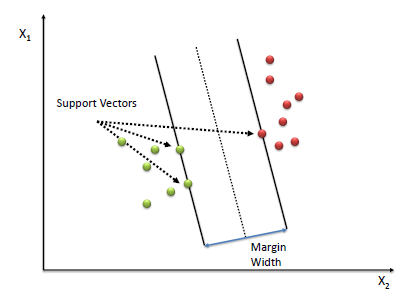

In [33]:
from IPython.display import Image
Image("img/SVM_2_dimension.png")

   Support Vector Machine (SVM) is a supervised learning algorithm.  Given a set of dataset, it attempts to draw  boundary lines (for two-dimensional space or a hyperplane for multi-dimensional space) with maximum margin from the closest features of the dataset into multiple classes.  In our intervention problem, we have to identify which students may be failing and required intervention.  That feature is called "passed" and it has two categories - yes or no.  Let assume for a moment that our dataset is linear for simplicity, SVM attempts to separate the dataset to either "yes" or "no" side of the boundary lines.   Using the 2-dimensional graph above (graph is taken from [here](http://www.bing.com/images/search?q=support+vector+machine+diagram+of+2+dimensional+space&view=detailv2&&id=47C1E90D88016123DA6708BB6AFE9A077D0AD7E1&selectedIndex=0&ccid=MHtUN%2bDg&simid=608049001029831221&thid=OIP.M307b5437e0e060f6563ded9d5391ba2eo0&ajaxhist=)), we can visualize our problem this way:
   - Green dots on the left side of the boundary lines represent students with passed = yes (not required for intervention).
   - Red dots on the right side of the boundary lines represent students with passed = no (require intervention).
   - For prediction, SVM attempts to put target data on either side.
   
  The above scenario is an ideal scenario where data are clearly separable on either side of the boundary lines.  In our problem (still assuming it is linear), there are some features and their data that may not be relevant.  In this scenario, SVM provides parameter C and gamma for us to tune so that some of these features/data can be "ignored" or stray into the margin.  The higher the C, the less number of data to be ignored.  The gamma defines "how far the influence of a single training example reaches, with low values meaning ‘far’ (model is too constrained) and high values meaning ‘close’ ([1](http://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html)).  These paramaters minimize on overfitting our model and provide generalization.  The below diagram (taken from [here](https://www.google.com/search?q=support+vector+machine+diagram+with+error&biw=1600&bih=712&source=lnms&tbm=isch&sa=X&ved=0ahUKEwivguXBw4rQAhVGMSYKHfYbDusQ_AUIBigB#imgrc=pNnOfvY-0WFM-M%3A)) depicts this scenario where some blue dots and red dots are inside the outer dotted boundary lines.

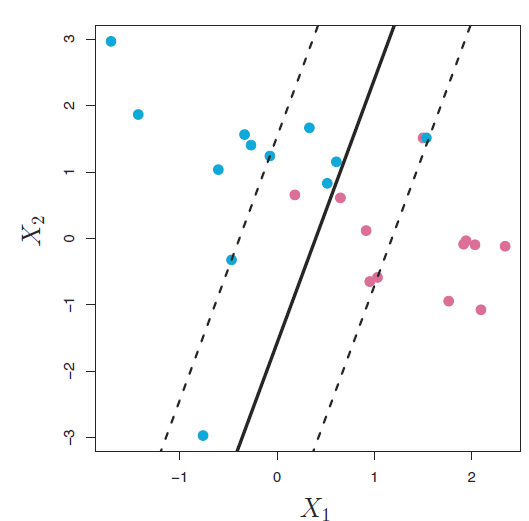

In [34]:
from IPython.display import Image
Image("img/SVM_2_dimension_with_error.png")

   In our intervention problem, the data is not linearly separable.  SVM provides kernel trick to move these data into multi-dimensional space.  Instead of drawing boundary lines with maximum margin, SVM attempts to draw a hyperplane with maximum margin to separate these data as depicted in the diagram below (taken [here](http://www.bing.com/images/search?q=support+vectore+machine+diagram&view=detailv2&&id=77AEA143335184E0A96D8B14439798B8251B925A&selectedIndex=4&ccid=GG3MHe4f&simid=608056255231492160&thid=OIP.M186dcc1dee1f3ad9f8684cff83cce0a4o0&ajaxhist=0)):
   As discussed above, for prediction, SVM attempts to put target data on either side of this hyperplane.

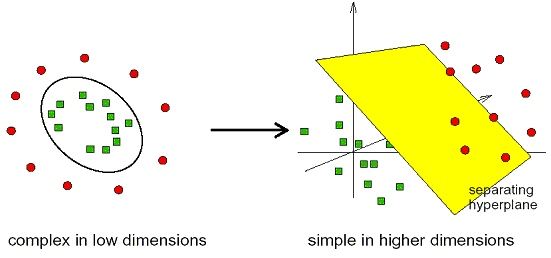

In [35]:
from IPython.display import Image
Image("img/SVM_multi_dimensions.png")

### Implementation: Model Tuning
Fine tune the chosen model. Use grid search (`GridSearchCV`) with at least one important parameter tuned with at least 3 different values. You will need to use the entire training set for this. In the code cell below, you will need to implement the following:
- Import [`sklearn.grid_search.gridSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html) and [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Create a dictionary of parameters you wish to tune for the chosen model.
 - Example: `parameters = {'parameter' : [list of values]}`.
- Initialize the classifier you've chosen and store it in `clf`.
- Create the F<sub>1</sub> scoring function using `make_scorer` and store it in `f1_scorer`.
 - Set the `pos_label` parameter to the correct value!
- Perform grid search on the classifier `clf` using `f1_scorer` as the scoring method, and store it in `grid_obj`.
- Fit the grid search object to the training data (`X_train`, `y_train`), and store it in `grid_obj`.

In [41]:
# TODO: Import 'GridSearchCV' and 'make_scorer'
from sklearn.metrics import make_scorer
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import ShuffleSplit


# Create cross-validation set from training data to test out different k-fold sizes to see if it makes any difference.
#cv_sets = ShuffleSplit(X_train.shape[0], n_iter = 3, test_size = test_sample, random_state = 16)
cv_sets = ShuffleSplit(X_train.shape[0], n_iter = 5, test_size = test_sample, random_state = 16)
#cv_sets = ShuffleSplit(X_train.shape[0], n_iter = 10, test_size = test_sample, random_state = 16)

# TODO: Create the parameters list you wish to tune
#parameters = {'kernel': ('linear', 'rbf'), 'C':[0.5, 1, 10, 20]}
#parameters = {'kernel': ('linear', 'rbf'), 'C':[0.5, 1, 10, 20], 'gamma':[0.001,0.01, 0.1, 0.5, 1, 1.5]}
#parameters = {'kernel': ('linear', 'rbf'), 'C':[0.5, 1, 10, 20], 'gamma':[0.01, 0.1, 0.5, 1, 1.5]}
#parameters = {'kernel': ('linear', 'rbf'), 'C':[0.5, 1, 10, 20], 'gamma':[0.1, 0.5, 1, 1.5]}
#parameters = {'kernel': ('linear', 'rbf'), 'C':[0.5, 1, 10, 20], 'gamma':[0.5, 1, 1.5]}
#parameters = {'kernel': ('linear', 'rbf'), 'C':[0.5 1, 10, 20], 'gamma':[0.5, 1]}
parameters = {'kernel': ('linear', 'rbf'), 'C':[0.5, 1, 10, 20], 'gamma':[0.1, 0.5, 1]}
#parameters = {'kernel': ('linear', 'rbf'), 'C':[10, 20, 40], 'gamma':[0.1,0.5,1]}
#parameters = {'kernel': ('poly', 'sigmoid'), 'C':[0.5, 1, 10, 20], 'gamma':[0.01, 0.1, 1]}
#parameters = {'kernel': ('poly', 'sigmoid'), 'C':[0.5, 1, 10, 20], 'gamma':[0.01, 0.1, 1], 'coef0':[0.5,1.0]}

# TODO: Initialize the classifier
clf = SVC(random_state=16)

# TODO: Make an f1 scoring function using 'make_scorer' 
f1_scorer = make_scorer(f1_score, pos_label="yes")

# TODO: Perform grid search on the classifier using the f1_scorer as the scoring method
grid_obj = GridSearchCV(estimator=clf, param_grid=parameters,scoring=f1_scorer, cv=cv_sets)

# TODO: Fit the grid search object to the training data and find the optimal parameters
grid_obj = grid_obj.fit(X_train, y_train)

# Get the estimator
clf = grid_obj.best_estimator_

# Report the final F1 score for training and testing after parameter tuning
print "Tuned model has a training F1 score of {:.4f}.".format(predict_labels(clf, X_train, y_train))
print "Tuned model has a testing F1 score of {:.4f}.".format(predict_labels(clf, X_test, y_test))

# Display best parameters chosen
print "Parameter 'kernel' is {} for the optimal model.".format(clf.get_params()["kernel"])
print "Parameter 'C' is {} for the optimal model.".format(clf.get_params()["C"])
print "Parameter 'gamma' is {} for the optimal model.".format(clf.get_params()["gamma"])

Made predictions in 0.0060 seconds.
Tuned model has a training F1 score of 0.9802.
Made predictions in 0.0020 seconds.
Tuned model has a testing F1 score of 0.8442.
Parameter 'kernel' is rbf for the optimal model.
Parameter 'C' is 1 for the optimal model.
Parameter 'gamma' is 0.1 for the optimal model.


### Question 5 - Final F<sub>1</sub> Score
*What is the final model's F<sub>1</sub> score for training and testing? How does that score compare to the untuned model?*

**Answer: **

The SVM's final F<sub>1</sub> score for training and testing are **0.9802** and **0.8442**, respectively.  For training sample's F<sub>1</sub> score, the tuned model's result outperformed the untuned model's result substantially by .11.  However, for the testing sample, the results are not much better - only by 0.02. Looking at the best estimator (the optimal model after tuning), kernel is set to "rbf", C is set to 1, and gamma is set to 0.1.  By default (without tuning), SVM set kernel to "rbf", C to 1, and gamma to 1/30 (30 = number of features for this problem).  The only difference here for the tuned vs untuned model is gamma. I suspect here that the number of records in dataset may be limited for SVM to make a difference.  Perhaps if we have more data, the result may come out a lot better for tuned model.

### EXTRA
This additional work is for me to see if adding more data will make any difference to the tuned vs untuned SVM.  Since I do not have real data to add, I basically duplicated the original 395 and made the new dataset to 790.  This is obviously bias as I now have half of the data that are the same as the other half.  Nonetheless, I still think it is a valid test.  

In [45]:
student_data_2 = pd.read_csv("student-data-double.csv")
print "Student data read successfully!"

# Extract feature columns
feature_cols_2 = list(student_data_2.columns[:-1])

# Extract target column 'passed'
target_col_2 = student_data_2.columns[-1] 

# Show the list of columns
#print "Feature columns:\n{}".format(feature_cols_2)
#print "\nTarget column: {}".format(target_col_2)

# Separate the data into feature data and target data (X_all and y_all, respectively)
X_all_2 = student_data_2[feature_cols_2]
y_all_2 = student_data_2[target_col_2]

# call get_dummy
X_all_2 = preprocess_features(X_all_2)
#print "Processed feature columns ({} total features):\n{}".format(len(X_all_2.columns), list(X_all_2.columns))

# TODO: Set the number of training points
num_train_2 = 594 #75% of data for training

# Set the number of testing points
num_test_2 = X_all_2.shape[0] - num_train_2

test_sample_2 = float(num_test_2) / float(X_all_2.shape[0])

# TODO: Shuffle and split the dataset into the number of training and testing points above
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_all_2, y_all_2, test_size=test_sample_2, random_state=16)


# Show the results of the split
print "Training set has {} samples.".format(X_train_2.shape[0])
print "Testing set has {} samples.".format(X_test_2.shape[0])


# First try SVM untuned - using default values
print " "
print "SVM - untuned"
clf_untuned = SVC(random_state=16)
train_predict(clf_untuned, X_train_2, y_train_2, X_test_2, y_test_2)
print " "

print "SVM - tuned"
cv_sets_2 = ShuffleSplit(X_train_2.shape[0], n_iter = 5, test_size = test_sample_2, random_state = 16)

parameters_2 = {'kernel': ('linear', 'rbf'), 'C':[0.5, 1, 10, 20], 'gamma':[0.1, 0.5, 1]}

# TODO: Initialize the classifier
clf_2 = SVC(random_state=16)

# TODO: Make an f1 scoring function using 'make_scorer' 
f1_scorer_2 = make_scorer(f1_score, pos_label="yes")

# track time
start = time()
   
# TODO: Perform grid search on the classifier using the f1_scorer as the scoring method
grid_obj_2 = GridSearchCV(estimator=clf_2, param_grid=parameters_2,scoring=f1_scorer_2, cv=cv_sets_2)

# TODO: Fit the grid search object to the training data and find the optimal parameters
grid_obj_2 = grid_obj_2.fit(X_train_2, y_train_2)

# Get the estimator
clf_2 = grid_obj_2.best_estimator_

end = time()

# Print the results
print "Trained tuned model in {:.4f} seconds".format(end - start)


start = time()
# Report the final F1 score for training and testing after parameter tuning
print "Tuned model has a training F1 score of {:.4f}.".format(predict_labels(clf_2, X_train_2, y_train_2))
end = time()
print "Prediction time for tuned model with training in {:.4f} seconds".format(end - start)


start = time()
print "Tuned model has a testing F1 score of {:.4f}.".format(predict_labels(clf_2, X_test_2, y_test_2))
end = time()
print "Prediction time for tuned model with testing in {:.4f} seconds".format(end - start)


# Display best parameters chosen
print "Parameter 'kernel' is {} for the optimal model.".format(clf_2.get_params()["kernel"])
print "Parameter 'C' is {} for the optimal model.".format(clf_2.get_params()["C"])
print "Parameter 'gamma' is {} for the optimal model.".format(clf_2.get_params()["gamma"])

Student data read successfully!
Training set has 594 samples.
Testing set has 196 samples.
 
SVM - untuned
Training a SVC using a training set size of 594. . .
Trained model in 0.0230 seconds
Made predictions in 0.0160 seconds.
F1 score for training set: 0.8866.
Made predictions in 0.0060 seconds.
F1 score for test set: 0.8721.
 
SVM - tuned
Trained tuned model in 33.6960 seconds
Made predictions in 0.0150 seconds.
Tuned model has a training F1 score of 1.0000.
Prediction time for tuned model with training in 0.0170 seconds
Made predictions in 0.0050 seconds.
Tuned model has a testing F1 score of 0.9510.
Prediction time for tuned model with testing in 0.0060 seconds
Parameter 'kernel' is rbf for the optimal model.
Parameter 'C' is 10 for the optimal model.
Parameter 'gamma' is 0.1 for the optimal model.


## Results
As you can see, the untuned SVM's F<sub>1</sub> scores for both training and testing improve, especially for the testing - by 0.5.  For tuned SVM, F<sub>1</sub> scores for both training and testing improve dramatically.  Training's score goes to 1 and testing score goes to 0.95.  This tells me that if we have more data, SVM will perform even better.  

For untuned SVM, performance for training time and prediction are just a little higher but still are in line with previous results.

For tuned SVM, the training time dramatically increased to 33 seconds.  Prediction times are in line with the other results.  Obviously, if we have tens of thousands of records, training time for tuned SVM will probably be very, very high.  

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.